In [2]:
#ワインの分類を行いたい

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

#準備
# データロード
wine = datasets.load_wine()
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [22]:
# 説明変数(AlcoholからProlineの各項目)
X = wine.data
X = pd.DataFrame(X, columns=["Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Colour Intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])

# 目的変数(3段階のクラス)
Y = wine.target
Y = pd.DataFrame(Y, columns = ["class"])

# 学習データとテストデータ分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, shuffle=True, random_state=3)
#X_trainにデータの70%が、X_testに残りの30%が含まれる

In [23]:
#import pandas as pld
#import mglearn

## X_train（訓練データ）からDataFrame作成
#wine_dataframe = pld.DataFrame(X_train, columns=wine.feature_names)

## DataFrameからscatter_matrixを作成
#from pandas.plotting import scatter_matrix
#grr = scatter_matrix(wine, c=Y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
#plt.show()

In [24]:
# モデル設定と訓練データを使った学習
from sklearn import tree
tree_model= tree.DecisionTreeClassifier(max_depth=3) # 決定木モデル（最大深さ3）
tree_model = tree_model.fit(X_train, Y_train) # 訓練データで学習

/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

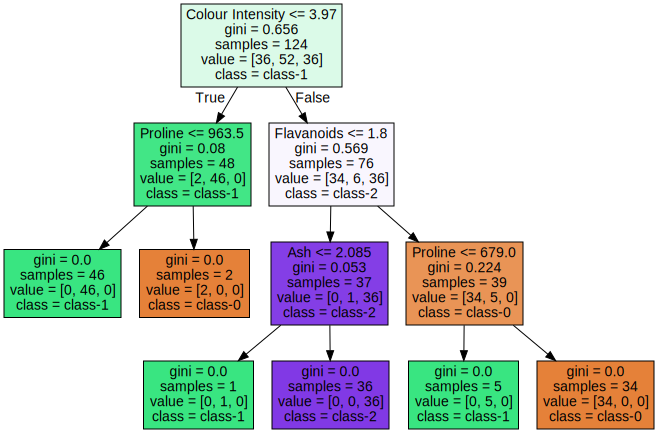

In [25]:
#決定木の可視化(graphvizバージョン)

import graphviz
from sklearn import tree

# 可視化設定
viz = tree.export_graphviz(tree_model,                                      # 決定木モデル           
           feature_names=X_train.columns.tolist(),                          # 説明変数項目名
           class_names=["class-0","class-1","class-2"],  # 正解ラベル名
           filled=True,                                                     # 枠内の色塗り有無
                               )

# グラフ描画
graph = graphviz.Source(viz, format="png") 
graph

/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


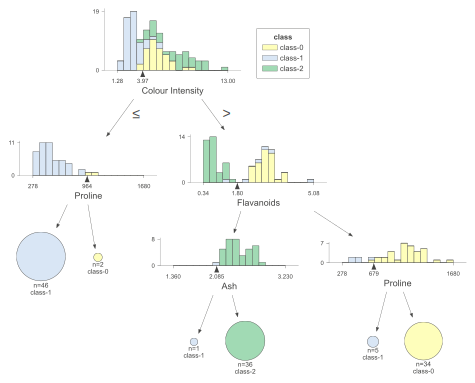

In [26]:
# 可視化(dtreezバージョン)
import dtreeviz

# 可視化設定
viz = dtreeviz.model(tree_model,                                                        # 決定木モデル
                X_train,                                                          # 説明変数（dataframe形式）
                Y_train["class"],                                               # 正解ラベル(Series形式)
                feature_names = X_train.columns.tolist(),                         # 説明変数項目名
                target_name = "class",                                          # 正解ラベル項目名 
                class_names = ["class-0","class-1","class-2"]  # 正解ラベル名
)

# 可視化
viz.view()

In [27]:
# 推論
Y_pred_tree = tree_model.predict(X_test)

# 出力
print(Y_pred_tree)

[0 0 0 1 2 0 0 1 1 0 1 0 1 1 0 0 1 0 2 2 0 1 1 2 1 1 0 0 1 2 1 0 2 1 1 2 0
 1 0 2 0 2 1 1 1 0 0 1 2 0 0 2 0 2]


/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# 混合行列
cf_mat = confusion_matrix(Y_test, Y_pred_tree)

# 出力
print(f'正解率: {accuracy_score(Y_test, Y_pred_tree)}')
print('混合行列')
print(cf_mat)

正解率: 0.9074074074074074
混合行列
[[21  2  0]
 [ 1 17  1]
 [ 0  1 11]]


/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/tocochan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecat